Thanks to https://towardsdatascience.com/11-visualization-examples-to-practice-matplotlib-4fe4c7dd665c

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [3]:
cols = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary',
'Exited']

churn = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv", usecols=cols)

churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


# Let's check the number of customers per country

In [8]:
country = churn['Geography'].value_counts().index

In [10]:
customers = churn['Geography'].value_counts().values

([<matplotlib.axis.YTick at 0x7f49c51e1dd0>,
 <a list of 6 Text major ticklabel objects>)

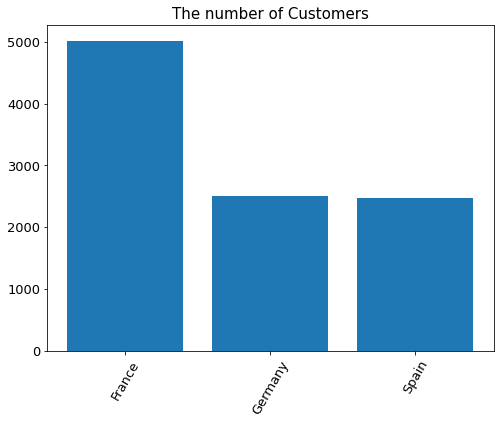

In [16]:
plt.figure(figsize=(8,6))

plt.title("The number of Customers", fontsize=15)

plt.bar(x=country, height=customers)

plt.xticks(fontsize=13, rotation=60)
plt.yticks(ticks=np.arange(0, 6000, 1000), fontsize=13)

In [17]:
plt.rcParams.get('figure.figsize')

[6.0, 4.0]

In [18]:
plt.rcParams['figure.figsize'] = (8,6)

In [19]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <a list of 10 Patch objects>)

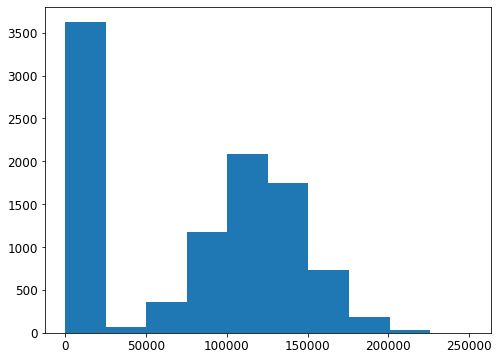

In [20]:
plt.hist(x=churn.Balance)

Text(0.5, 1.0, 'Distribution of Balance')

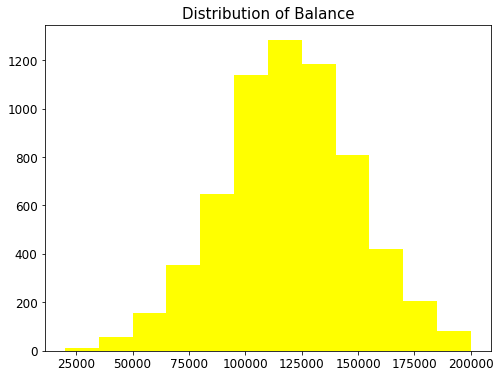

In [23]:
plt.hist(x=churn.Balance, bins=12, color='yellow',range=(20000, 200000))

plt.title("Distribution of Balance", fontsize=15)

In [ ]:
plt.hist2d(x=churn['CreditScore'], y=churn['Age'])

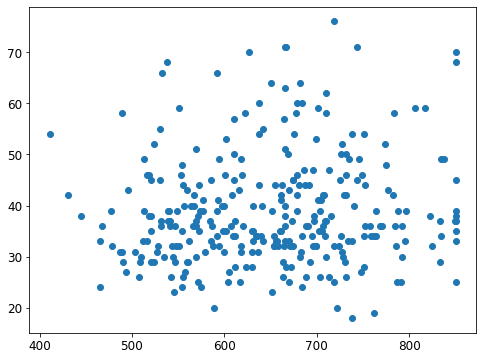

In [25]:
sample = churn.sample(n=300, random_state=2020)
plt.scatter(sample['CreditScore'], sample['Age'])

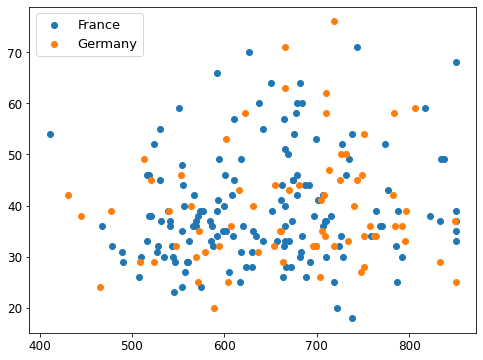

In [27]:
fig, ax = plt.subplots()

ax.scatter(x=sample[sample.Geography == 'France']['CreditScore'], y=sample[sample.Geography == 'France']['Age'])

ax.scatter(x=sample[sample.Geography == 'Germany']['CreditScore'], y=sample[sample.Geography == 'Germany']['Age'])

ax.legend(labels=['France','Germany'], loc='upper left', fontsize=13)

Text(0.5, 1.0, 'Number of Products')

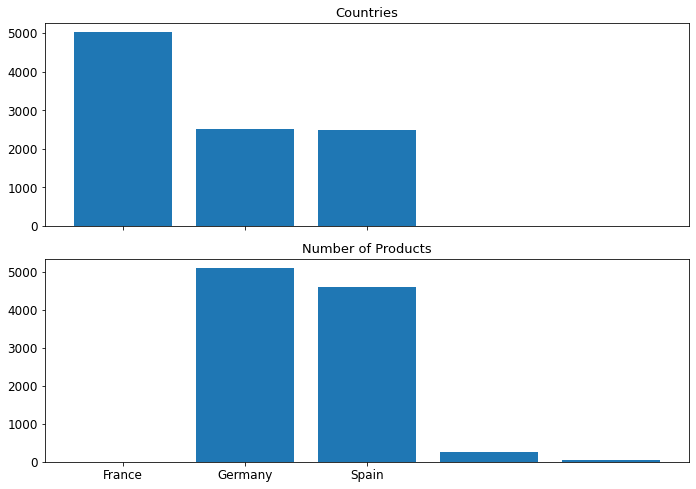

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=1, figsize=(10,7), sharex=True)

fig.tight_layout(pad=2)

countries = churn.Geography.value_counts()
products = churn.NumOfProducts.value_counts()

ax1.bar(x=countries.index, height=countries.values)
ax1.set_title("Countries", fontsize=13)

ax2.bar(x=products.index, height=products.values)
ax2.set_title("Number of Products", fontsize=13)